<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt1_BoW_NearMiss_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


Using TensorFlow backend.


In [3]:
ls

 cleanedfinancial_data.csv   JGEPart1.txt         Part1-GE.json   X.pickle
 FinalFiles/                'Part1-GE (1).json'   sample_data/    y.pickle


In [0]:
from google.colab import files

In [0]:
upload = files.upload()

In [0]:
## Our file is present, just import it

In [0]:
dataset = pd.read_csv("cleanedfinancial_data.csv")

In [5]:
dataset.head()

,Unnamed: 0,sentiment,text
0,0,neutral,"Good day, ladies and gentlemen, and welcome to..."
1,1,negative,I'm not sure. I think Model T was a little bit...
2,2,negative,"Well, we need to bring the Shanghai factory on..."
3,3,neutral,So it's - it is eligible for that. But it soun...
4,4,positive,The demand for - the demand for Model 3 is ins...


In [0]:
dataset.drop(columns="Unnamed: 0", inplace=True)

Value counts

In [7]:
dataset.sentiment.value_counts()

neutral     838
positive    654
negative    157
Name: sentiment, dtype: int64

**Data is imbalanced, therefore, we first build a logistic regression model as our base model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
dataset.shape[0]

1649

In [11]:
dataset.iloc[2,1]

"Well, we need to bring the Shanghai factory online. I think that's the biggest driver for getting to 500K plus a year. Our car is just very expensive going into China. We've got import duties. We've got transport costs. We've got higher-cost labor here. And we've never been eligible for any of the EV tax credits. A lot of people sort of dependent on incentives. In fact, we are [indiscernible] EVs, we have the least access to incentives. It's pretty crazy because there's so many companies that - countries that have put price caps on the EV incentive, which affects Tesla. And in China, which is the biggest market for EVs, we've never had any subsidies or tax incentives for vehicles."

In [12]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
# import autocorrect
# from autocorrect. import spell

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
dataset.shape

In [0]:
data = []

In [0]:
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

In [15]:
len(data)

1649

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = matrix.fit_transform(data).toarray()
y = dataset.iloc[:, 0]


In [0]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import pandas as pd

In [0]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


In [0]:
nm = NearMiss(ratio='not minority',random_state=777, version=1, n_neighbors=1)
X_nm, y_nm = nm.fit_sample(X_train,y_train)

In [23]:
classifier.fit(X_nm,y_nm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Testing model performance
sent_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, sent_pred)

In [25]:
cm

array([[21,  1,  8],
       [45, 80, 54],
       [59,  6, 56]])

In [0]:
import matplotlib.pyplot as plt

In [27]:
y.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = y.unique()

In [0]:
import itertools

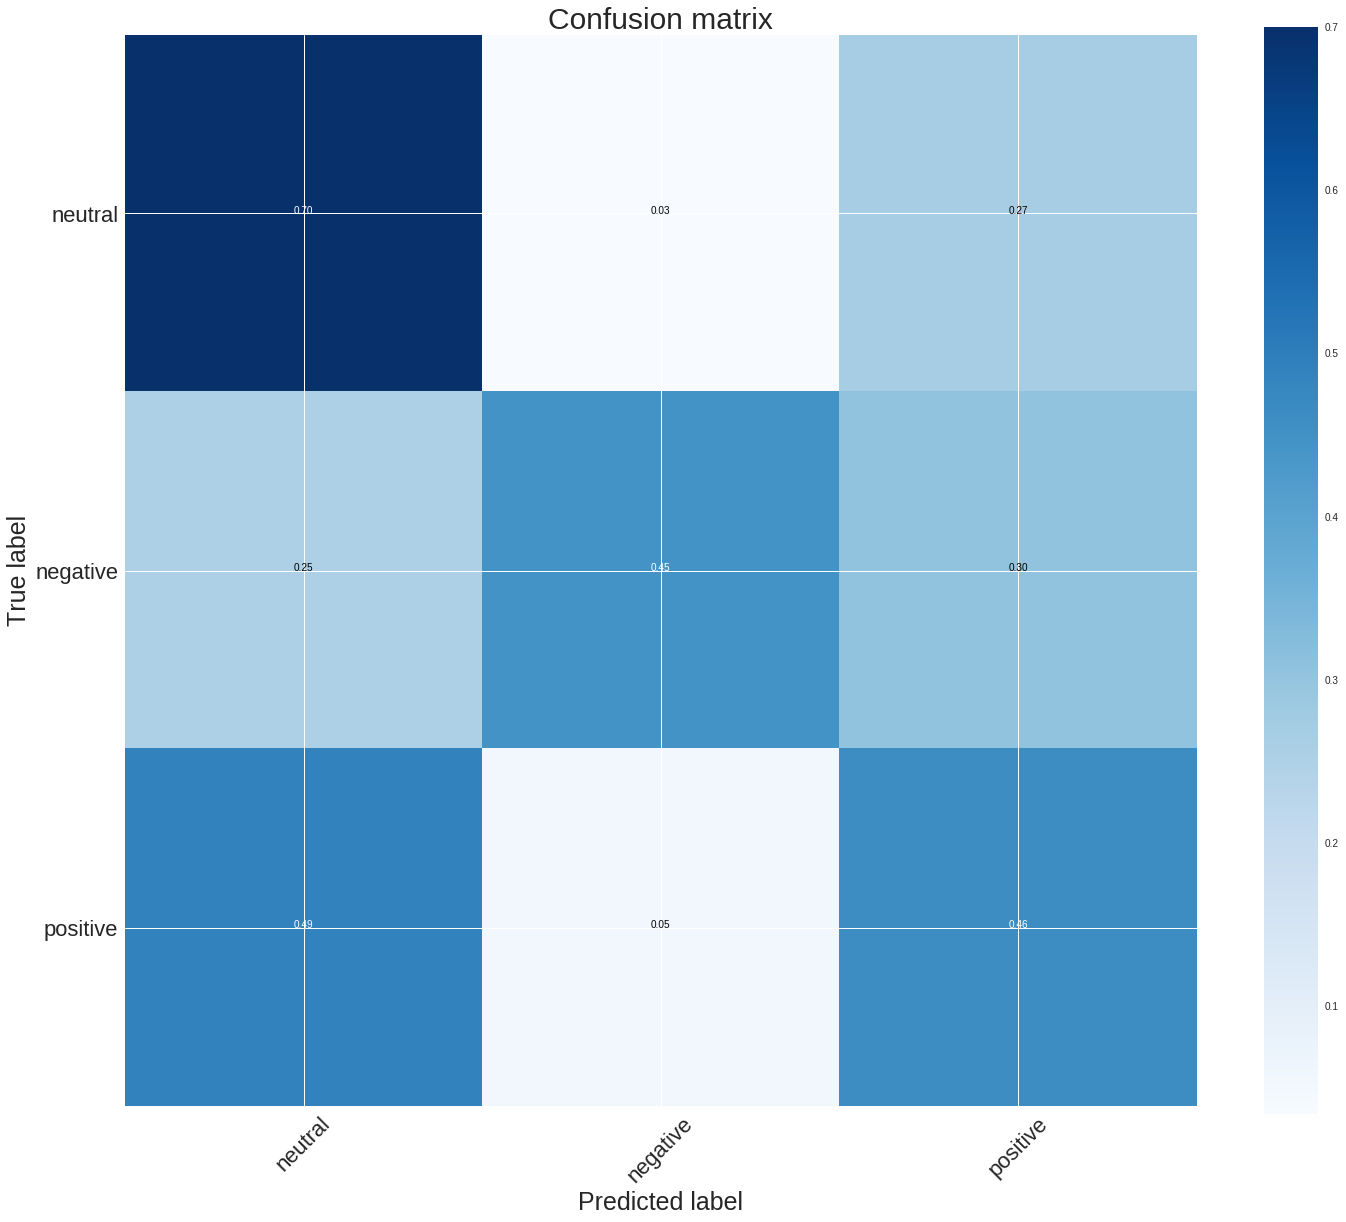

In [31]:
plt.figure(figsize=(24,20))
plot_confusion_matrix(cm, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
accuracy = accuracy_score(y_test,sent_pred)

In [34]:
accuracy

0.47575757575757577

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
f1_score(y_test, sent_pred, average="macro")

0.4470302493986349